# Loan Tap - Logistic Regression Case Study






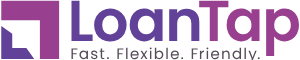

## About Data

Loantap is a leading financial technology company based in India, specializing in providing flexible and innovative loan products to individuals and businesses. With a focus on customer-centric solutions, Loantap leverages technology to offer hassle-free borrowing experiences, including personal loans, salary advances, and flexible EMI options. Their commitment to transparency, speed, and convenience has established them as a trusted partner for borrowers seeking efficient financial solutions.

- LoanTap is at the forefront of offering tailored financial solutions to millennials.

- Their innovative approach seeks to harness data science for refining their credit underwriting process.

- The focus here is the Personal Loan segment. A deep dive into the dataset can reveal patterns in borrower behavior and creditworthiness.

- Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.

- The insights gained can optimize loan disbursal, balancing customer outreach with risk management.

## Objective

As a data scientist at LoanTap, you are tasked with analyzing the dataset to determine the creditworthiness of potential borrowers. Your ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay, RocCurveDisplay,f1_score,recall_score,precision_score
)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv("logistic_regression.csv")

In [49]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [50]:
df.shape

(396030, 27)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [53]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [54]:
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [55]:
round(((df.isna().sum()/df.shape[0])*100),2).sort_values(ascending=False)

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

In [56]:
df.duplicated().sum()

0

In [57]:
df.nunique().sort_values(ascending=False)

address                 393700
emp_title               173105
installment              55706
revol_bal                55622
title                    48816
annual_inc               27197
dti                       4262
loan_amnt                 1397
revol_util                1226
earliest_cr_line           684
int_rate                   566
total_acc                  118
issue_d                    115
open_acc                    61
sub_grade                   35
mort_acc                    33
pub_rec                     20
purpose                     14
emp_length                  11
pub_rec_bankruptcies         9
grade                        7
home_ownership               6
application_type             3
verification_status          3
term                         2
loan_status                  2
initial_list_status          2
dtype: int64

**We don't have any duplicates in the data but we do have null values in the data which needs to be treated before EDA and model building.**

**We also have some categorical features in the data which needs to be converted into categorical variable.**

In [58]:
df.isna().sum().sum()/df.shape[0]*100

20.601974597884

**As 20% of our data contains null values, so we can't drop such a huge chunck of data for efficient model building.so,we will do null treatment like imputation.**

### Null Treatment

In [59]:
df["emp_title"]=df["emp_title"].fillna("Not Available")
df["emp_length"] = df["emp_length"].fillna("< 1 year")
df["title"]=df["title"].fillna("Unavailable")
df["mort_acc"]=df["mort_acc"].fillna(df["mort_acc"].mode()[0])
df.loc[df["pub_rec_bankruptcies"].isna(),"pub_rec_bankruptcies"] = 0.0
df["revol_util"]=df["revol_util"].fillna(df["revol_util"].mode()[0])


In [60]:
df.isna().sum().sum()/df.shape[0]*100

0.0

In [61]:
df.describe(include='object').T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,396030,173106,Not Available,22927
emp_length,396030,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [62]:
#Split issue_date into month and year
df[["issue_month", "issue_year"]] = df["issue_d"].str.split("-", expand=True)
df.drop(["issue_d"], axis=1, inplace=True)

In [63]:
#Split er_cr_line date into month and year
df[["er_cr_line_month", "er_cr_line_year"]] = df["earliest_cr_line"].str.split("-", expand=True)
df.drop(["earliest_cr_line"], axis=1, inplace=True)

In [175]:
df[["state","zipcode"]] = df["address"].str.extract(r"([A-Z]{2}) (\d{5})")
df.drop(["address"], axis=1, inplace=True)

### Feature Engineering

In [64]:
df["pub_rec"] = [1 if i > 1.0 else 0 for i in df["pub_rec"]]
df["mort_acc"] = [1 if i > 1.0 else 0 for i in df["mort_acc"]]
df["pub_rec_bankruptcies"] = [1 if i > 1.0 else 0 for i in df["pub_rec_bankruptcies"]]

In [66]:
# List of categorical columns
cat_cols = df.select_dtypes(include="object")

# List of numerical columns
num_cols = df.select_dtypes(exclude="object")

In [74]:
num_cols.head(2)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0,36369.0,41.8,25.0,0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0,20131.0,53.3,27.0,1,0


## Graphical Analysis

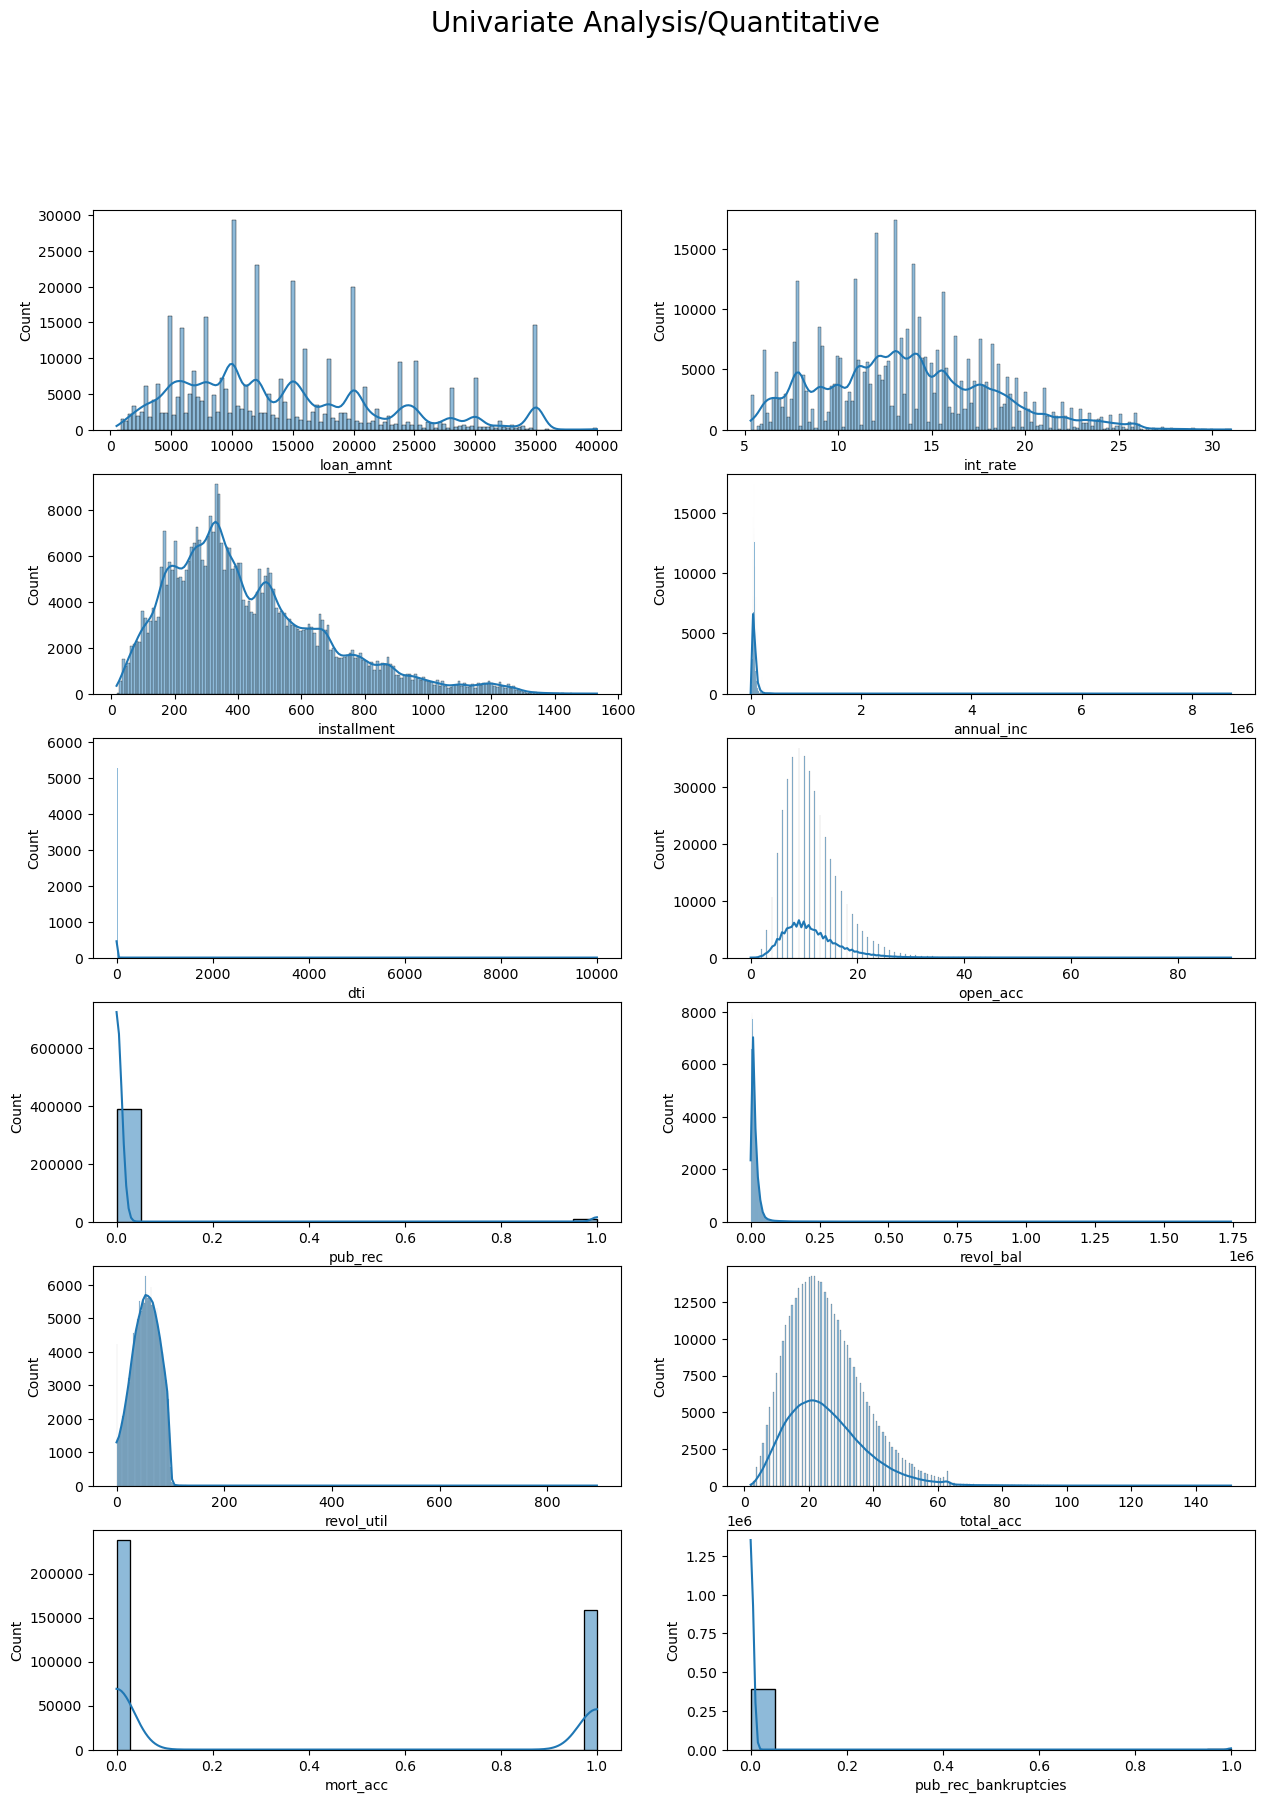

In [101]:
fig = plt.figure(figsize=(15,20)) 
for i,col in enumerate(num_cols,1):
    plt.subplot(6,2,i)
    sns.histplot(x=col,data=df,kde=True)
fig.suptitle("Univariate Analysis/Quantitative",fontsize=20) 
plt.show()

### Box Plot for outlier detection

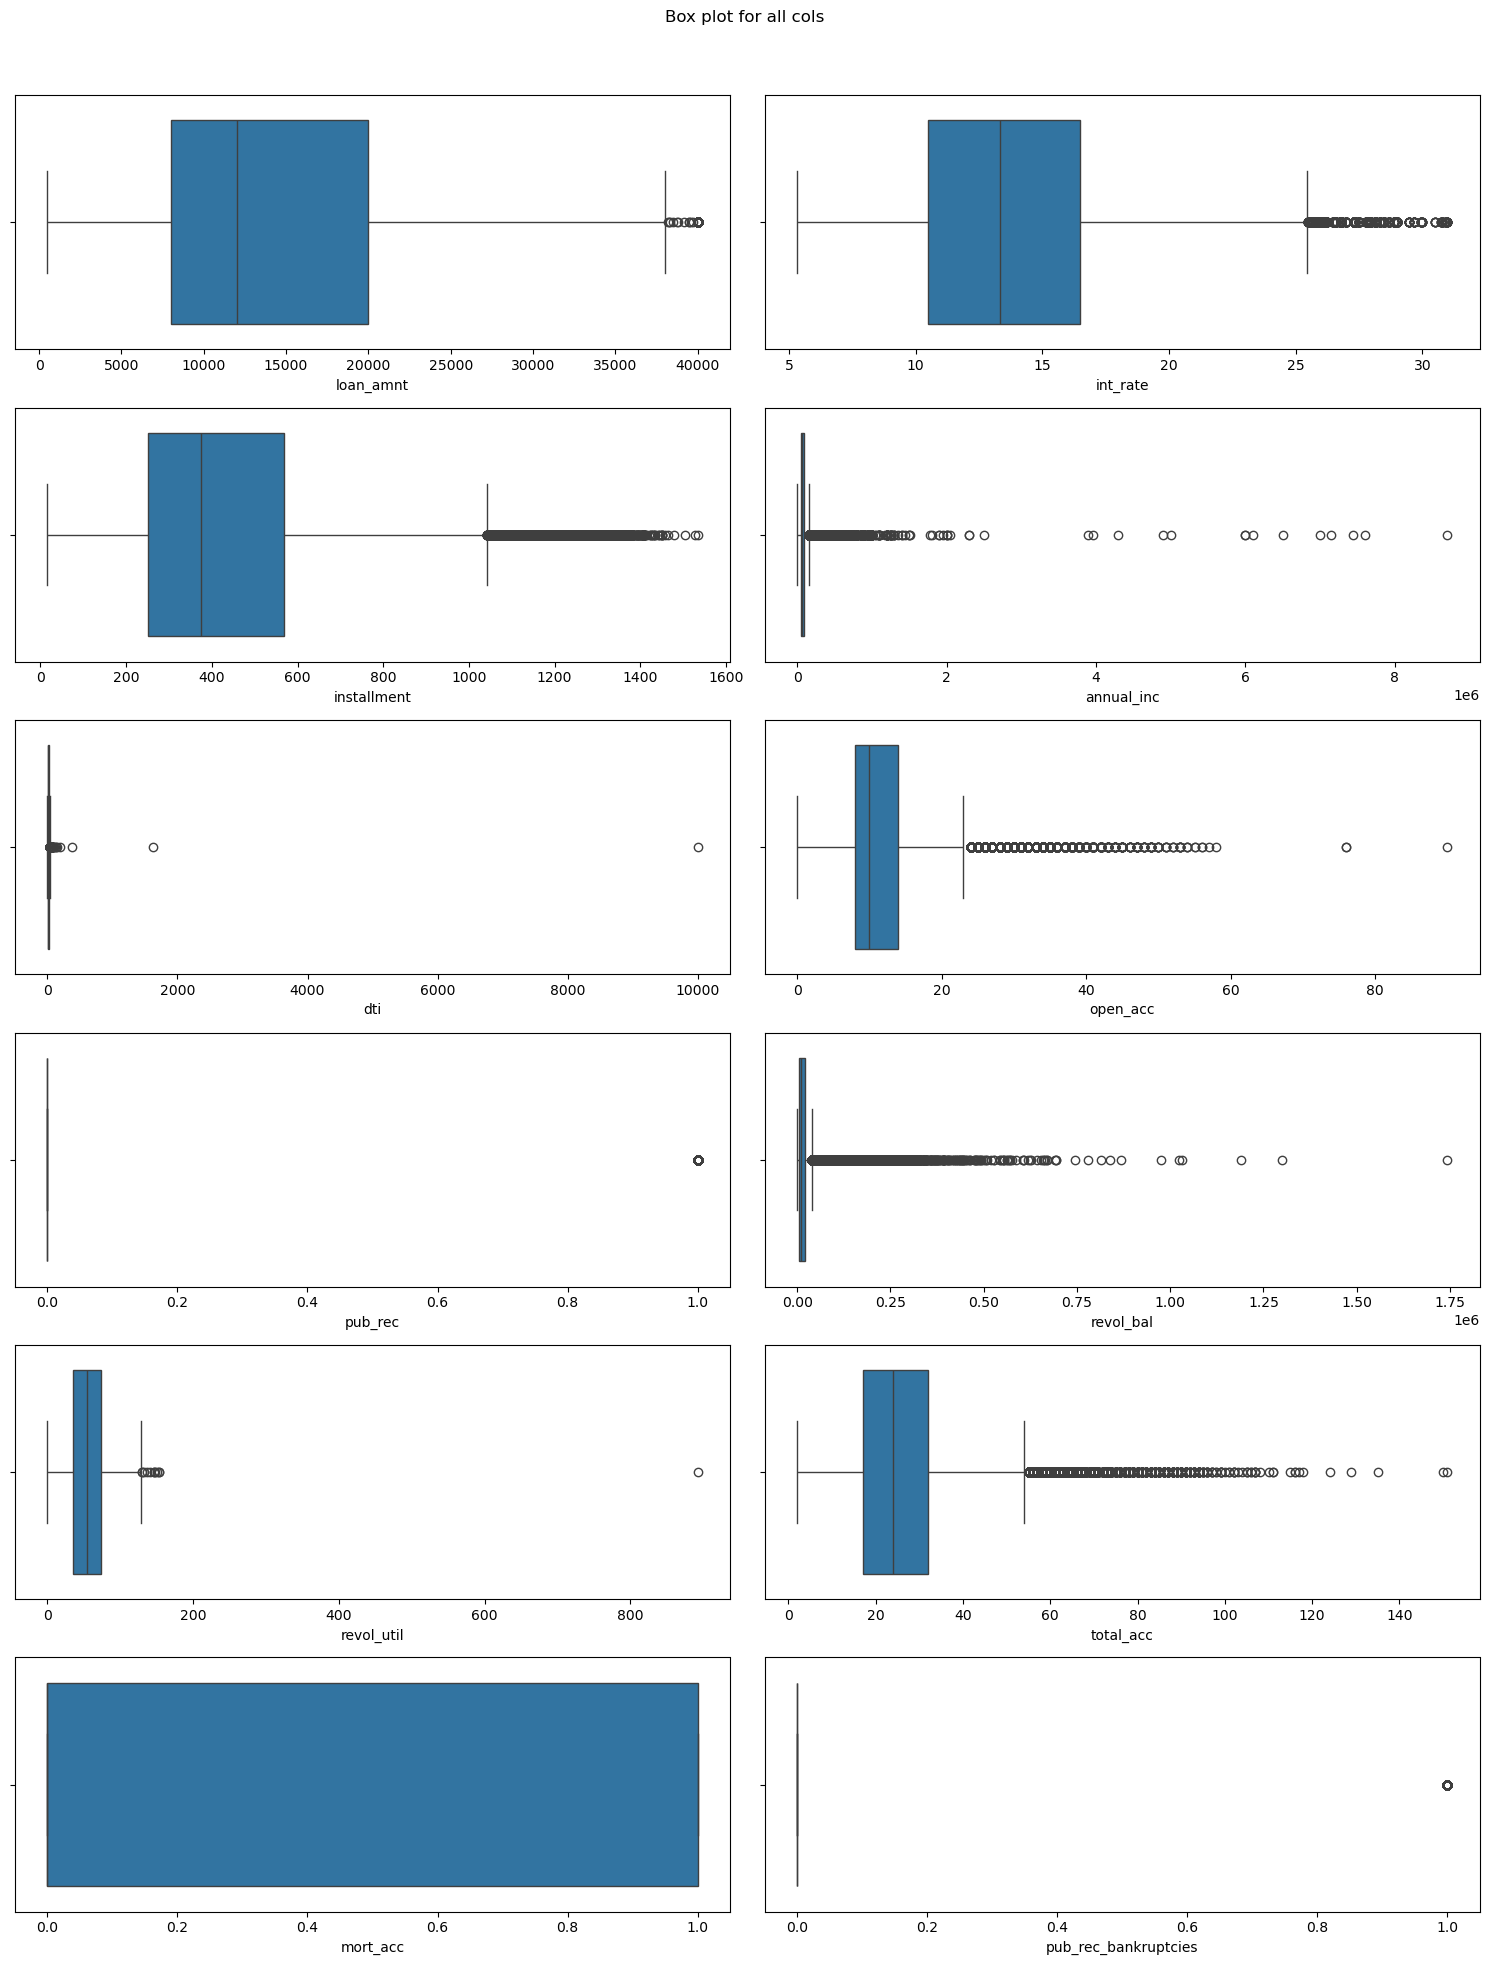

In [132]:
fig = plt.figure(figsize=(15,20)) 
for i,col in enumerate(num_cols,1):
    plt.subplot(6,2,i)
    sns.boxplot(x=col,data=df) 
fig.suptitle("Box plot for all cols") 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**From the boxplot it is evident that we have otliers in almost all numeric columns,which needs to be treated before model building.**

In [79]:
cat_cols.head(1)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type,address,issue_month,issue_year,er_cr_line_month,er_cr_line_year
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Jan,2015,Jun,1990


In [117]:
cat_cols1=["term","grade","sub_grade","emp_length","home_ownership","verification_status","loan_status","initial_list_status","application_type","purpose"]

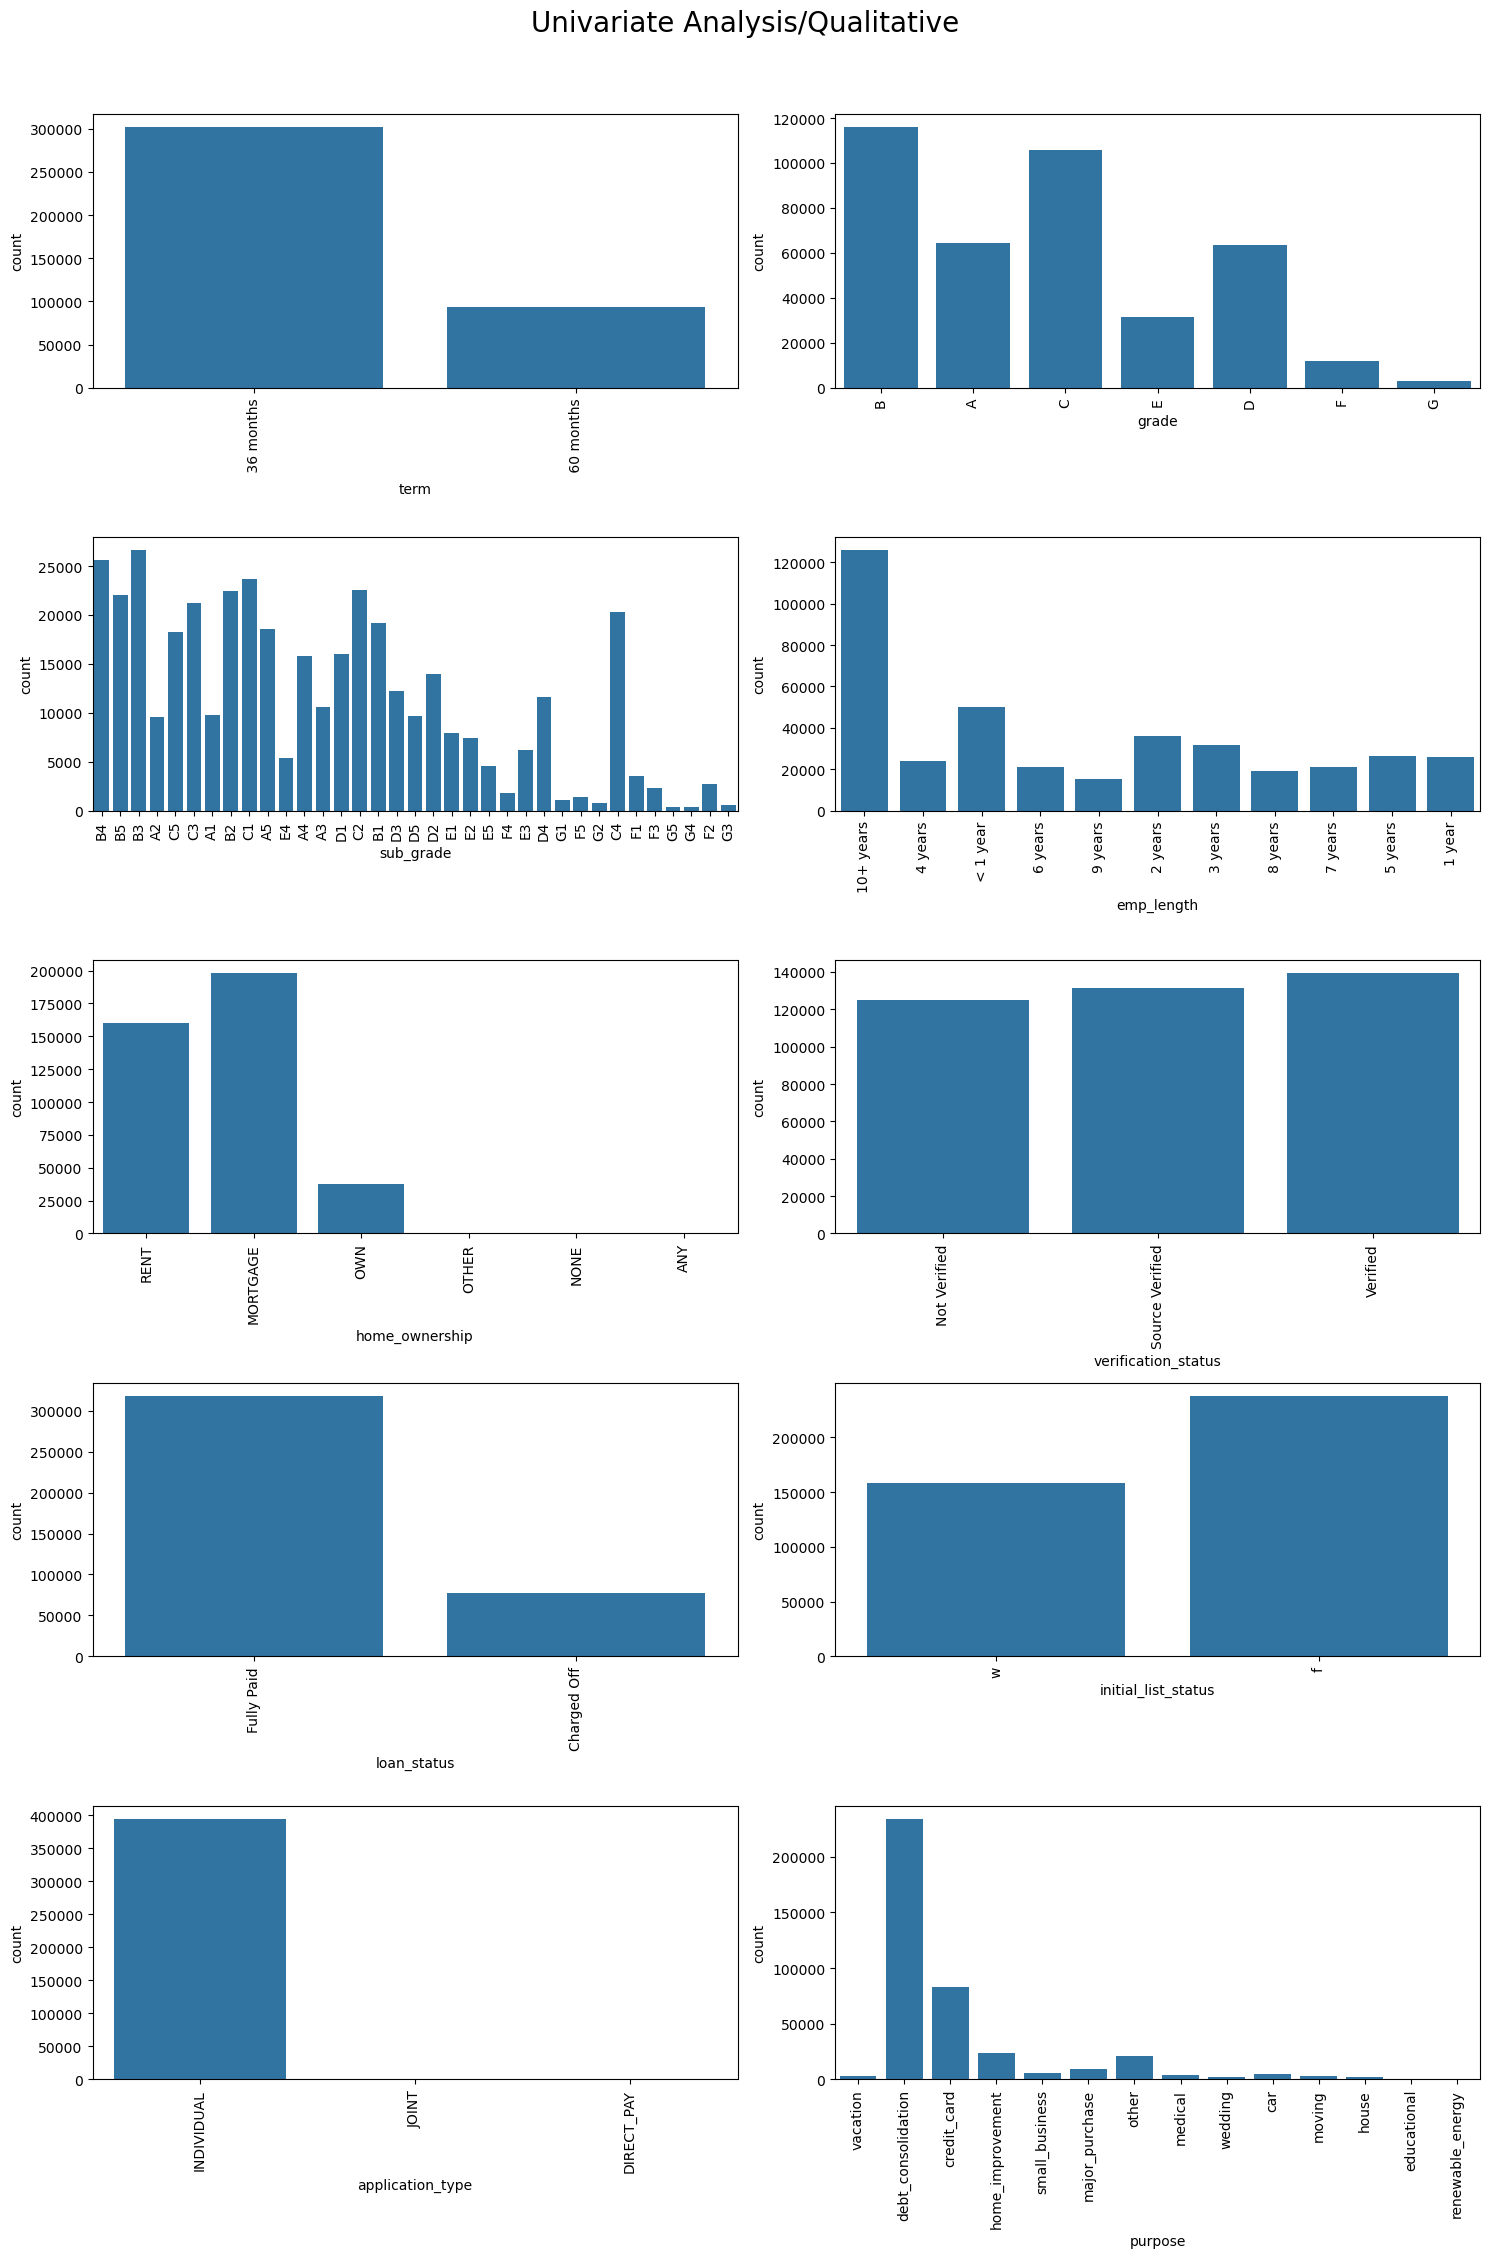

In [120]:
fig = plt.figure(figsize=(15,23)) 
for i,col in enumerate(cat_cols1,1):
    plt.subplot(5,2,i)
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=90)
    fig.suptitle("Univariate Analysis/Qualitative",fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Bivariate Analysis

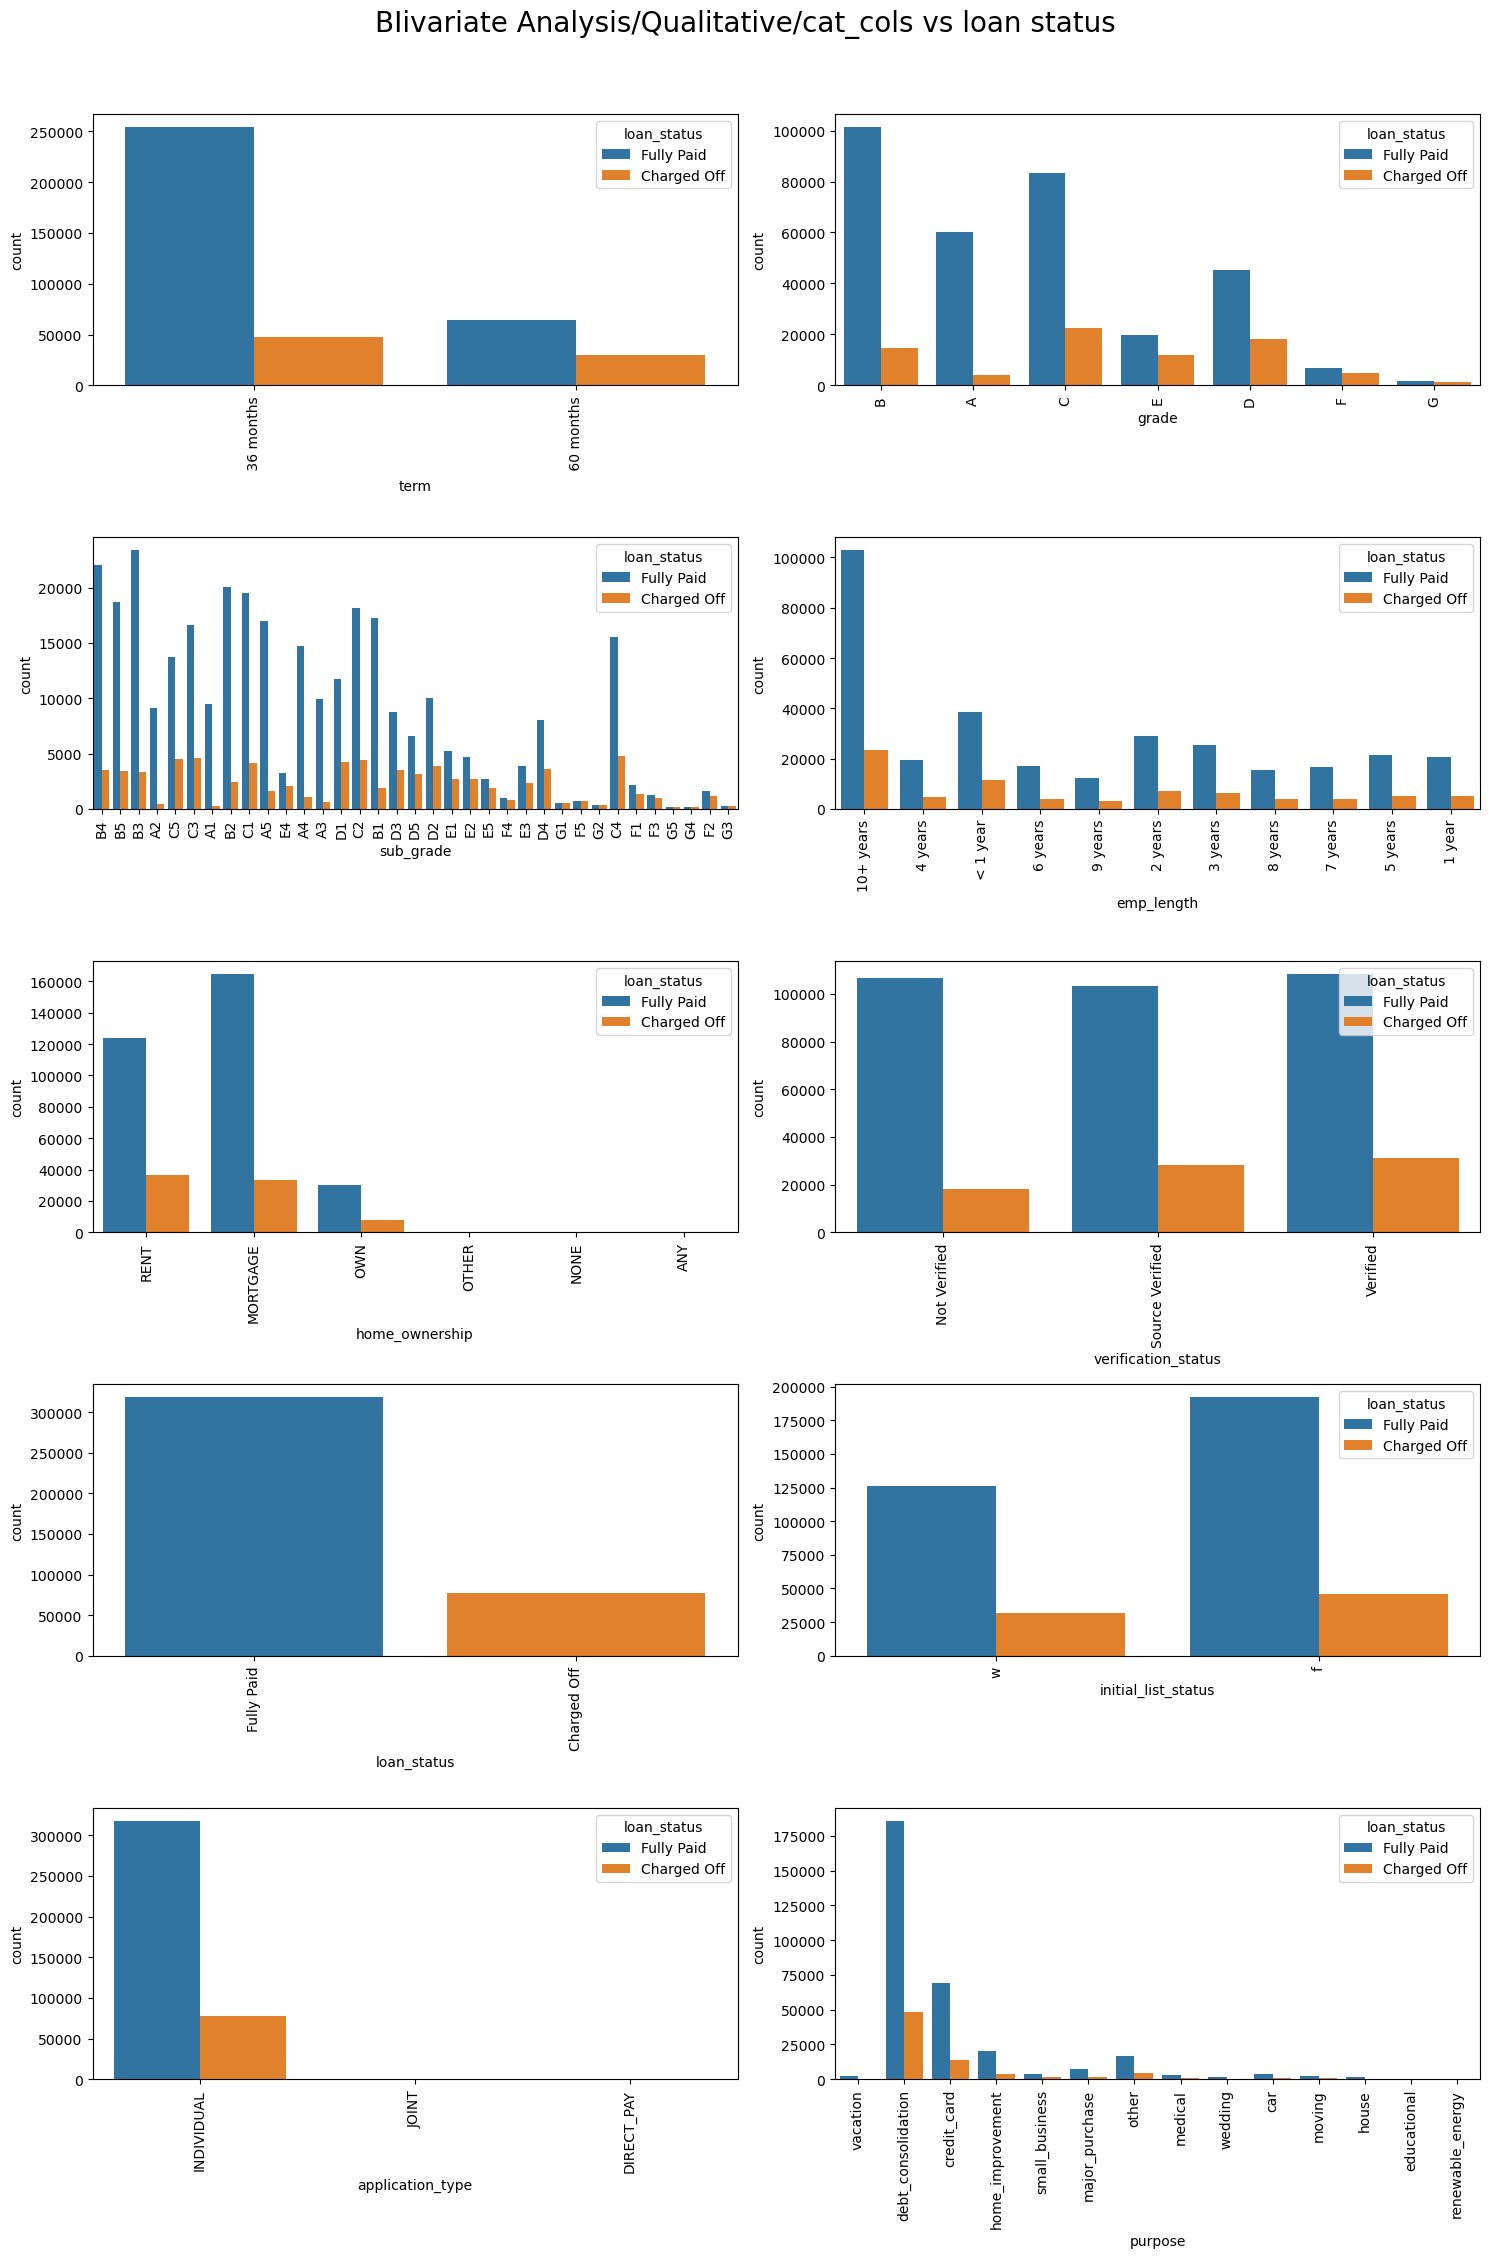

In [137]:
fig = plt.figure(figsize=(15,23)).suptitle("BIivariate Analysis/Qualitative/cat_cols vs loan status",fontsize=20) 
for i,col in enumerate(cat_cols1,1):
    plt.subplot(5,2,i)
    sns.countplot(x=col,hue="loan_status", data=df) 
    plt.xticks(rotation=90)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

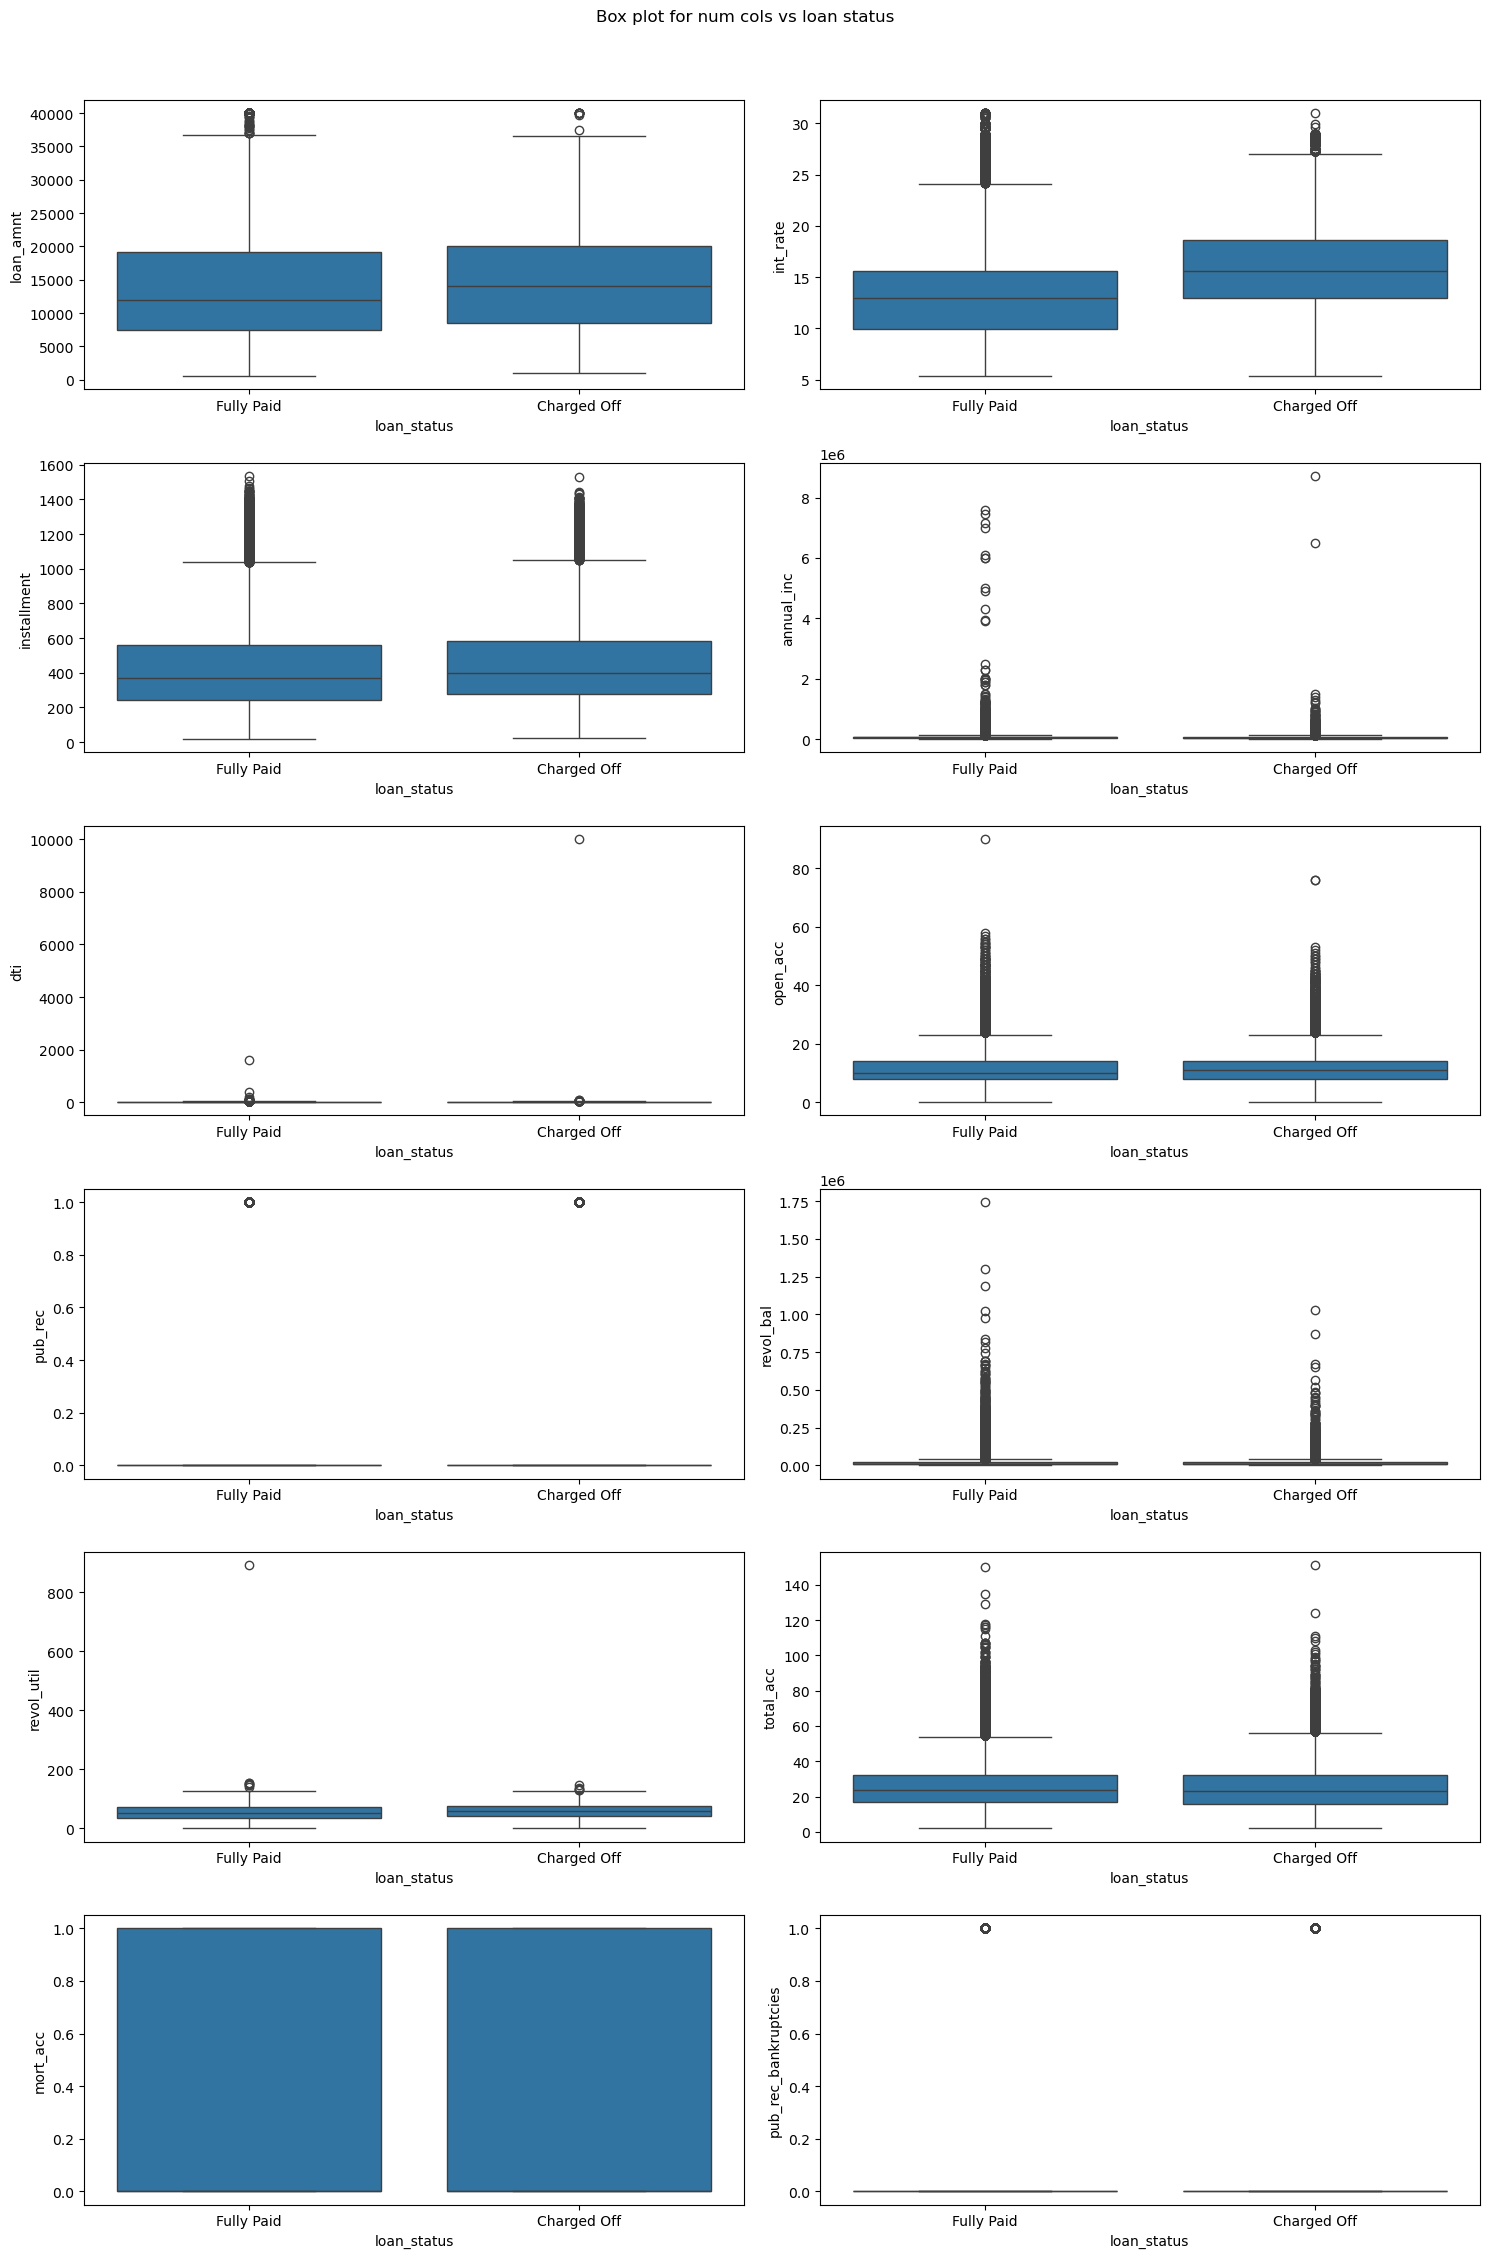

In [156]:
fig = plt.figure(figsize=(15,23)) 
for i,col in enumerate(num_cols,1):
    plt.subplot(6,2,i)
    sns.boxplot(x="loan_status",y=col,data=df) 
fig.suptitle("Box plot for num cols vs loan status") 
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

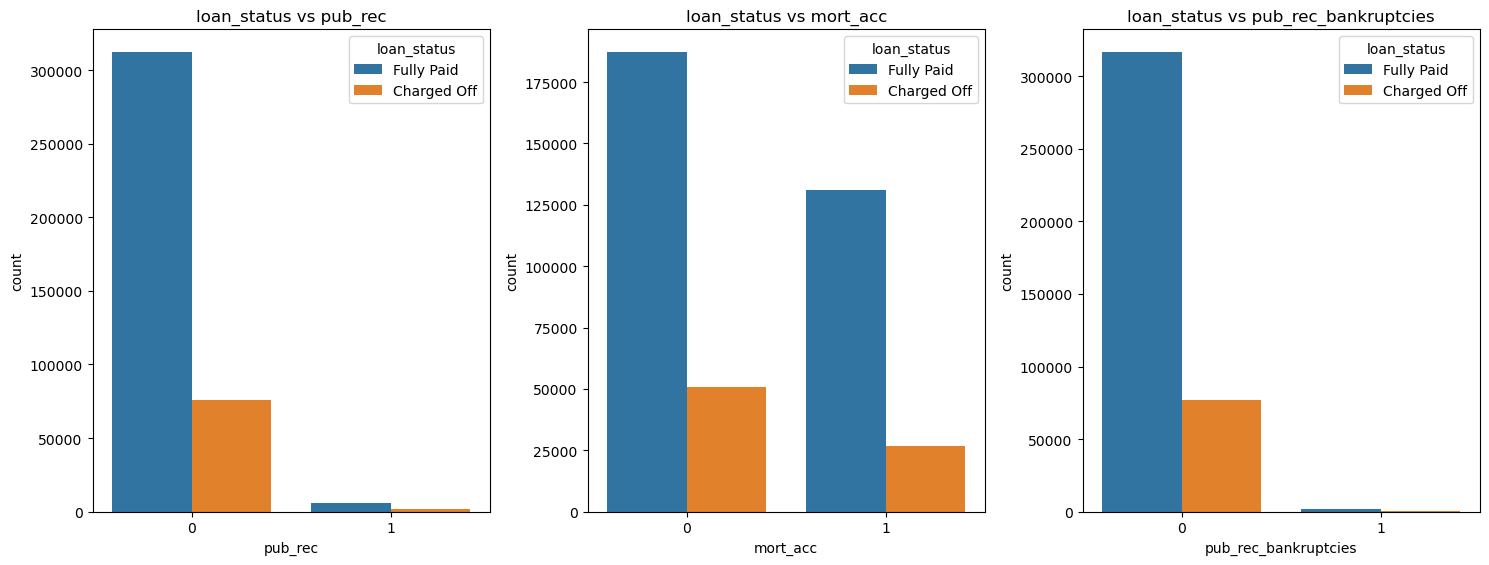

In [157]:
fig = plt.figure(figsize=(15,6)) 
plt.subplot(1,3,1)
sns.countplot(x="pub_rec",data=df,hue="loan_status")
plt.title("loan_status vs pub_rec")

plt.subplot(1,3,2)
sns.countplot(x="mort_acc",data=df,hue="loan_status")
plt.title("loan_status vs mort_acc")

plt.subplot(1,3,3)
sns.countplot(x="pub_rec_bankruptcies",data=df,hue="loan_status")
plt.title("loan_status vs pub_rec_bankruptcies")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

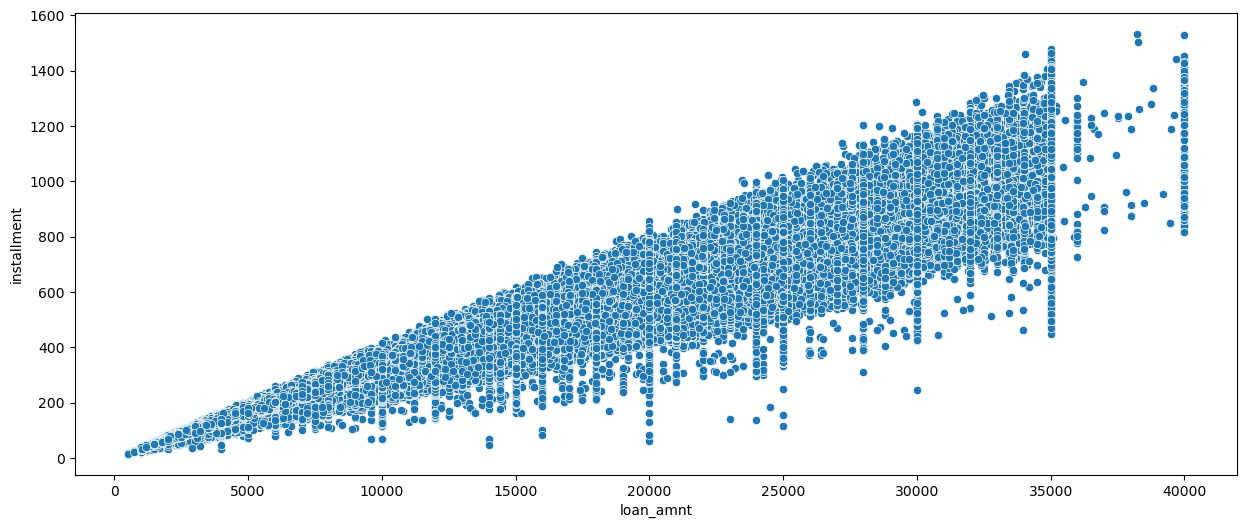

In [145]:
fig = plt.figure(figsize=(15,6)) 
sns.scatterplot(x="loan_amnt",y="installment",data=df)
plt.show()

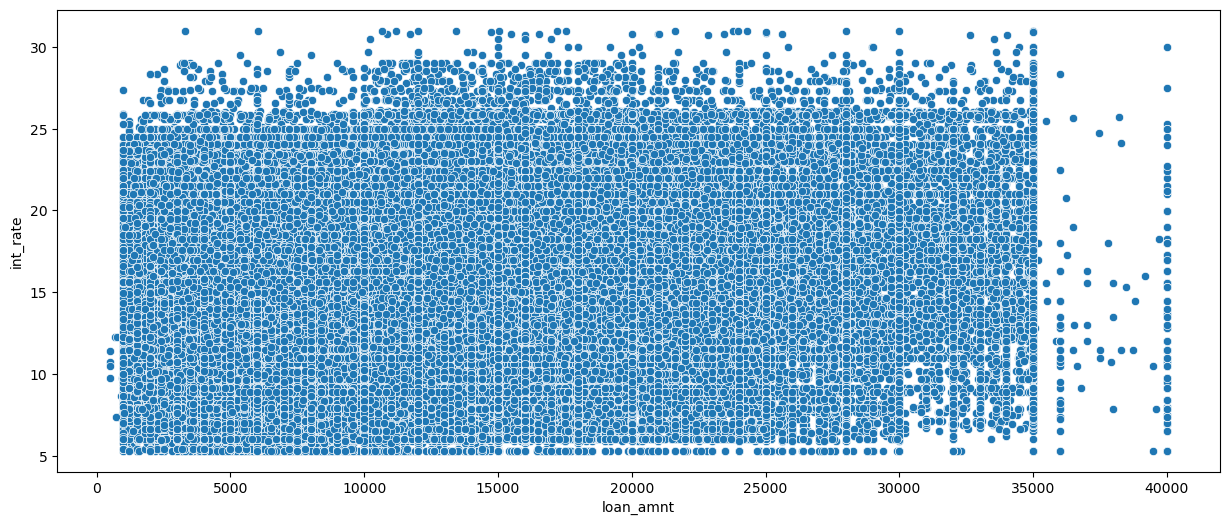

In [146]:
fig = plt.figure(figsize=(15,6)) 
sns.scatterplot(x="loan_amnt",y="int_rate",data=df)
plt.show()

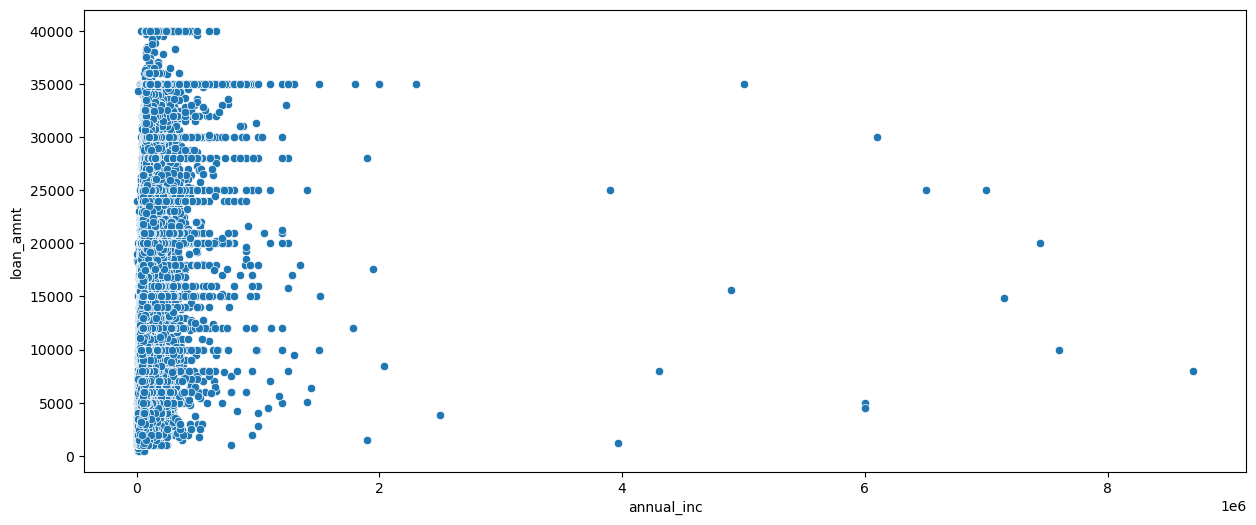

In [151]:
fig = plt.figure(figsize=(15,6)) 
sns.scatterplot(x="annual_inc",y="loan_amnt",data=df)
plt.show()

In [152]:
cr=num_cols.corr()
cr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.027789,0.328320,0.100286,0.223886,0.220650,-0.027837
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.036631,-0.011280,0.292349,-0.036404,-0.054173,0.021520
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.021382,0.316455,0.124179,0.202430,0.199140,-0.025444
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,0.010399,0.299773,0.027492,0.193023,0.196814,-0.009160
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.012845,0.063571,0.088491,0.102128,0.001661,-0.006361
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.009732,0.221192,-0.129081,0.680728,0.129318,-0.007626
pub_rec,-0.027789,0.036631,-0.021382,0.010399,-0.012845,-0.009732,1.000000,-0.044911,-0.040764,-0.001264,0.013248,0.534549
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.044911,1.000000,0.226245,0.191616,0.182652,-0.034154
revol_util,0.100286,0.292349,0.124179,0.027492,0.088491,-0.129081,-0.040764,0.226245,1.000000,-0.103372,0.018534,-0.035434
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,-0.001264,0.191616,-0.103372,1.000000,0.331766,0.016296


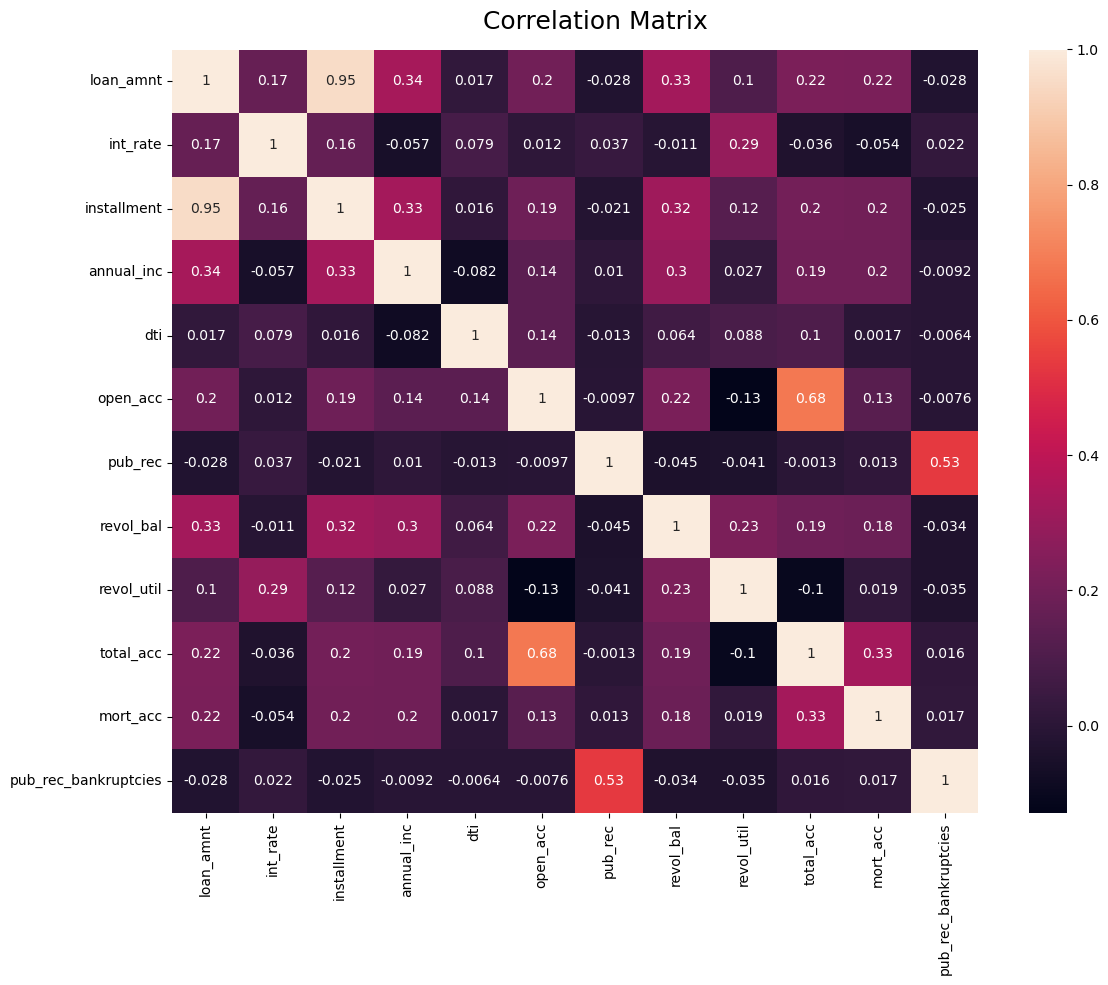

In [153]:
fig = plt.figure(figsize=(12,10)).suptitle("Correlation Matrix",fontsize=18) 
sns.heatmap(num_cols.corr(),annot=True)
plt.tight_layout()
plt.show()

- **There exists a strong correlation between loan_amnt and installment, indicating that higher loan amounts correspond to larger installment payments.**
- **The variables total_acc and open_acc is showing a significant correlation.**
- **There is a good correlation between pub_rec_bankruptcies and pub_rec as well.**


In [176]:
# outlier treatment
def remove_outliers(data, threshold=3): 
    
    # Calculate Z-scores for numerical columns
    z_score = (df[num_cols.columns] - df[num_cols.columns].mean()) / df[num_cols.columns].std()

    # Identify outliers
    outlier = np.abs(z_score) > threshold

    # Keep non-outliers for numerical columns
    df_new = df[~outlier.any(axis=1)]

    return df_new

In [177]:
df1 = remove_outliers(df)

In [178]:
df1.shape

(369208, 30)

In [179]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,369208.0,13669.662358,7938.993467,500.00,7675.00,12000.00,18900.0000,38475.00
int_rate,369208.0,13.557345,4.421167,5.32,10.16,13.18,16.2900,26.99
installment,369208.0,416.284609,230.827795,16.08,246.99,368.45,549.0275,1183.81
annual_inc,369208.0,69803.078745,35871.857100,4000.00,45000.00,62000.00,85000.0000,259000.00
dti,369208.0,17.330041,8.085114,0.00,11.31,16.89,22.9300,71.40
open_acc,369208.0,10.973124,4.595719,0.00,8.00,10.00,14.0000,26.00
pub_rec,369208.0,0.000000,0.000000,0.00,0.00,0.00,0.0000,0.00
revol_bal,369208.0,14098.853606,11601.848727,0.00,5964.00,10956.50,18864.0000,77618.00
revol_util,369208.0,53.878627,24.396420,0.00,36.00,54.90,72.9000,123.30
total_acc,369208.0,24.666112,10.987720,2.00,16.00,23.00,32.0000,61.00


### Label Encoding

In [181]:
df1["loan_status"]=df1.loan_status.map({"Fully Paid":1, "Charged Off":0})

df1["initial_list_status"]=df1.initial_list_status.map({"w":0, "f":1})

In [184]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_month,er_cr_line_year,state,zipcode
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0,0,Jan,2015,Jun,1990,OK,22690


In [185]:
df1["emp_length_time"] = df1["emp_length"].str.extract("(\d+)")
df1.drop(["emp_length"], axis=1, inplace=True)
df1["term"] = df1["term"].str.split().str[0].astype("object")

In [186]:
df1.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,er_cr_line_month,er_cr_line_year,state,zipcode,emp_length_time
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,INDIVIDUAL,0,0,Jan,2015,Jun,1990,OK,22690,10


### Removing unneccessary features

In [193]:
cat_cols1 = df1.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols1:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df1[col], df1["loan_status"]))
    if p > 0.05:
        print(col,"p_value:",p)

emp_title p_value: 0.08796940333678684
title p_value: 1.0
er_cr_line_month p_value: 0.1380278790045173
state p_value: 0.8265092011378623


In [194]:
df2 = df1.drop(columns=["emp_title","title","sub_grade","er_cr_line_month","er_cr_line_year","initial_list_status",
                        "state","issue_month","issue_year","pub_rec","pub_rec_bankruptcies"],axis=1)

In [195]:
df2.head(1)

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,application_type,mort_acc,zipcode,emp_length_time
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,1,vacation,26.24,16.0,36369.0,41.8,25.0,INDIVIDUAL,0,22690,10


### One Hot Encoding on multivariate features

In [196]:
dummies=["zipcode", "grade","purpose","home_ownership","verification_status","application_type"]
df3 = pd.get_dummies(df2, columns=dummies, drop_first=True)

In [197]:
df3.shape

(369208, 50)

In [198]:
df3.sample(1)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,...,purpose_wedding,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
288754,5400.0,36,7.75,168.6,8000.0,1,3.0,4.0,1321.0,16.5,...,False,False,False,False,False,True,False,False,True,False


In [199]:
X = df3.drop(["loan_status"], axis=1)
y = df3["loan_status"]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(295366, 49)
(73842, 49)
(295366,)
(73842,)


In [201]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [211]:
#Fit the Model on training data
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [212]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [213]:
model.score(X_test, y_test)

0.8898729720213429

In [214]:
model.score(X_test, y_test_pred)

1.0

In [223]:
model.coef_

array([[ 3.06401495e-02, -5.20513279e-01, -1.82601837e-02,
        -5.55513219e-01,  1.42734222e+00, -1.68076747e+00,
        -6.78086842e-01,  4.70377303e-01, -4.96482323e-01,
         5.45035129e-01,  7.83999731e-03,  1.23114517e-01,
         8.57930425e+00, -1.25752993e+01, -4.45579784e+00,
         8.60193133e+00, -4.46614609e+00, -4.49528668e+00,
        -4.46769462e+00, -1.25518226e+01, -1.25394661e+01,
        -5.53512607e-01, -1.02950119e+00, -1.30871528e+00,
        -1.50886151e+00, -1.64464494e+00, -1.64111246e+00,
        -2.41129149e-02, -9.25182826e-02, -4.18862284e-02,
        -1.55921892e-01,  7.45519921e-03, -7.96433044e-02,
        -2.56807412e-01, -8.93619261e-02, -1.20571148e-01,
        -2.03585651e-01, -4.71908078e-01, -4.13440942e-02,
         3.04798661e-01,  1.64092069e+00,  1.89129870e-01,
         7.48882522e-01,  1.51492599e+00,  1.39229000e+00,
        -2.14960406e-01, -1.18012675e-01,  2.39778447e-01,
         2.35944480e+00]])

In [324]:
df_= pd.DataFrame(list(zip(X_train.columns,np.abs((model.coef_.flatten())))),columns=["feature", "coeff"])
df_.sort_values(by="coeff",ascending=False)

,feature,coeff
13,zipcode_11650,9.008260
19,zipcode_86630,8.992093
20,zipcode_93700,8.980189
17,zipcode_48052,3.152789
18,zipcode_70466,3.125847
16,zipcode_30723,3.123890
14,zipcode_22690,3.113900
15,zipcode_29597,2.467996
12,zipcode_05113,2.465040
5,dti,1.606830


In [224]:
model.intercept_

array([5.82512612])

### Evaluation Metrics

In [220]:
print(f"Accuracy:        Train:{model.score(X_train, y_train)}      Test:{model.score(X_test, y_test)}")
print(f"F1 Score:        Train:{f1_score(y_train,y_train_pred)}       Test:{f1_score(y_test,y_test_pred)} ")
print(f"Recall Score:    Train:{recall_score(y_train,y_train_pred)}      Test:{recall_score(y_test,y_test_pred)} ")
print(f"Precision Score: Train:{precision_score(y_train,y_train_pred)}      Test:{precision_score(y_test,y_test_pred)} ")

Accuracy:        Train:0.8898383700222774      Test:0.8898729720213429
F1 Score:        Train:0.935572399372713       Test:0.9355697466208186 
Recall Score:    Train:0.9939207041044713      Test:0.9935715127139323 
Precision Score: Train:0.8836949203261764      Test:0.8839664026590409 


### Confusion Matrix

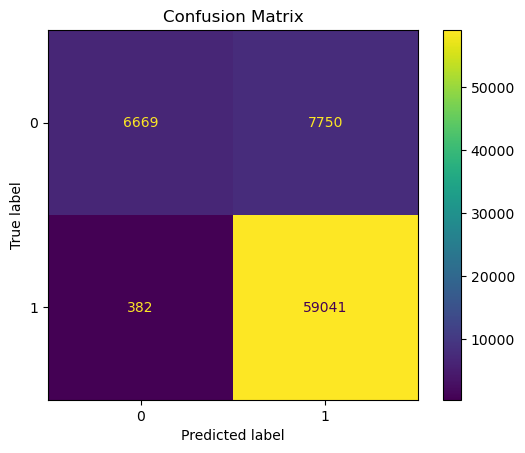

In [221]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [222]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14419
           1       0.88      0.99      0.94     59423

    accuracy                           0.89     73842
   macro avg       0.91      0.73      0.78     73842
weighted avg       0.90      0.89      0.87     73842



### Regularization

In [228]:
#Try with different regularization factor lamda and choose the best to build the model

lambd = np.arange(0.01, 1000, 10)

train_scores = []
test_scores = []

for i in lambd:
    model = LogisticRegression(C = 1/i)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)

    train_scores.append(tr_score)
    test_scores.append(te_score)

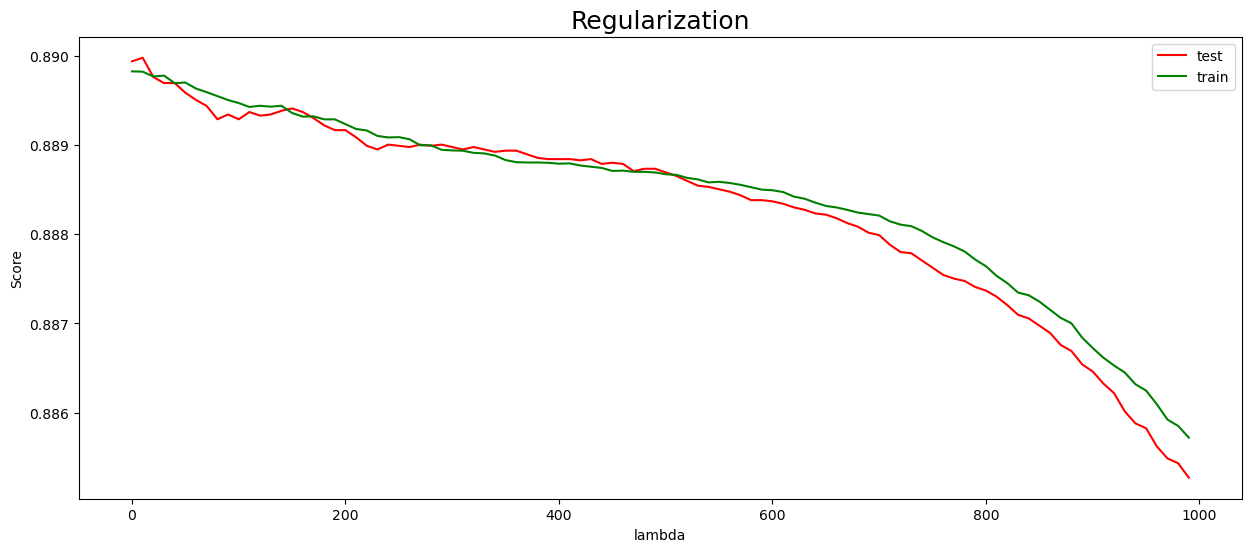

In [230]:
#Plot the train and test scores with respect lambda values i.e. regularization factors
range = np.arange(0.01, 1000, 10)
plt.figure(figsize=(15,6))
sns.lineplot(x=range,y=test_scores,color="red",label="test")
sns.lineplot(x=range,y=train_scores,color="green",label="train")
plt.title("Regularization",fontsize=18)
plt.xlabel("lambda")
plt.ylabel("Score")
plt.show()

In [266]:
print(np.argmax(test_scores))
print(test_scores[np.argmax(test_scores)])

1
0.889981311448769


In [267]:
opt_lambd = 0.01 + (10*1)
opt_lambd

10.01

In [268]:
model = LogisticRegression(C=1/opt_lambd)
model.fit(X_train, y_train)

LogisticRegression(C=0.0999000999000999)

In [269]:
y_test_pred = model.predict(X_test)

In [270]:
model.score(X_test, y_test)

0.889981311448769

In [271]:
print(f"Accuracy:        Train:{model.score(X_train, y_train)}      Test:{model.score(X_test, y_test)}")
print(f"F1 Score:        Train:{f1_score(y_train,y_train_pred)}       Test:{f1_score(y_test,y_test_pred)} ")
print(f"Recall Score:    Train:{recall_score(y_train,y_train_pred)}      Test:{recall_score(y_test,y_test_pred)} ")
print(f"Precision Score: Train:{precision_score(y_train,y_train_pred)}      Test:{precision_score(y_test,y_test_pred)} ")

Accuracy:        Train:0.8898248275021499      Test:0.889981311448769
F1 Score:        Train:0.935572399372713       Test:0.935680015201178 
Recall Score:    Train:0.9939207041044713      Test:0.9944129377513757 
Precision Score: Train:0.8836949203261764      Test:0.8834980488315416 


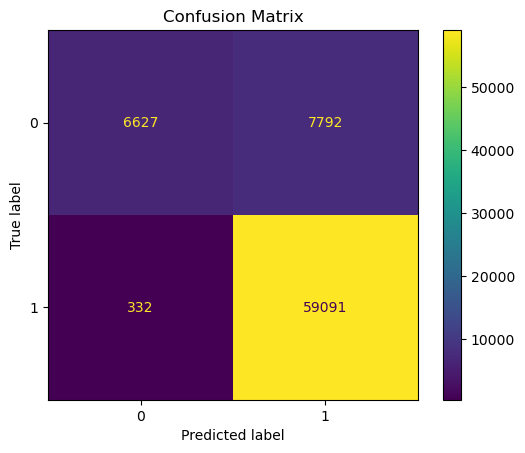

In [272]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [273]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     14419
           1       0.88      0.99      0.94     59423

    accuracy                           0.89     73842
   macro avg       0.92      0.73      0.78     73842
weighted avg       0.90      0.89      0.87     73842



### Oversampling

In [261]:
sm=SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 237692
Before OverSampling, count of label 0: 57674
After OverSampling, count of label 1: 237692
After OverSampling, count of label 0: 237692


In [262]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [263]:
print(f"Accuracy:        Train:{model.score(X_train, y_train)}      Test:{model.score(X_test, y_test)}")
print(f"F1 Score:        Train:{f1_score(y_train,y_train_pred)}       Test:{f1_score(y_test,y_test_pred)} ")
print(f"Recall Score:    Train:{recall_score(y_train,y_train_pred)}      Test:{recall_score(y_test,y_test_pred)} ")
print(f"Precision Score: Train:{precision_score(y_train,y_train_pred)}      Test:{precision_score(y_test,y_test_pred)} ")

Accuracy:        Train:0.798751379644238      Test:0.7978386284228488
F1 Score:        Train:0.935572399372713       Test:0.935680015201178 
Recall Score:    Train:0.9939207041044713      Test:0.9944129377513757 
Precision Score: Train:0.8836949203261764      Test:0.8834980488315416 


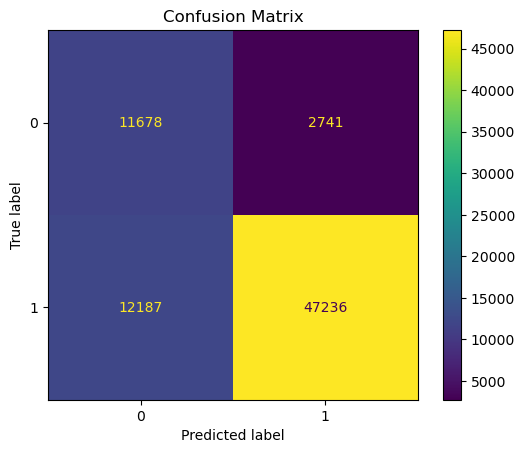

In [264]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [265]:
y_pred = test_preds
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.81      0.61     14419
           1       0.95      0.79      0.86     59423

    accuracy                           0.80     73842
   macro avg       0.72      0.80      0.74     73842
weighted avg       0.86      0.80      0.81     73842



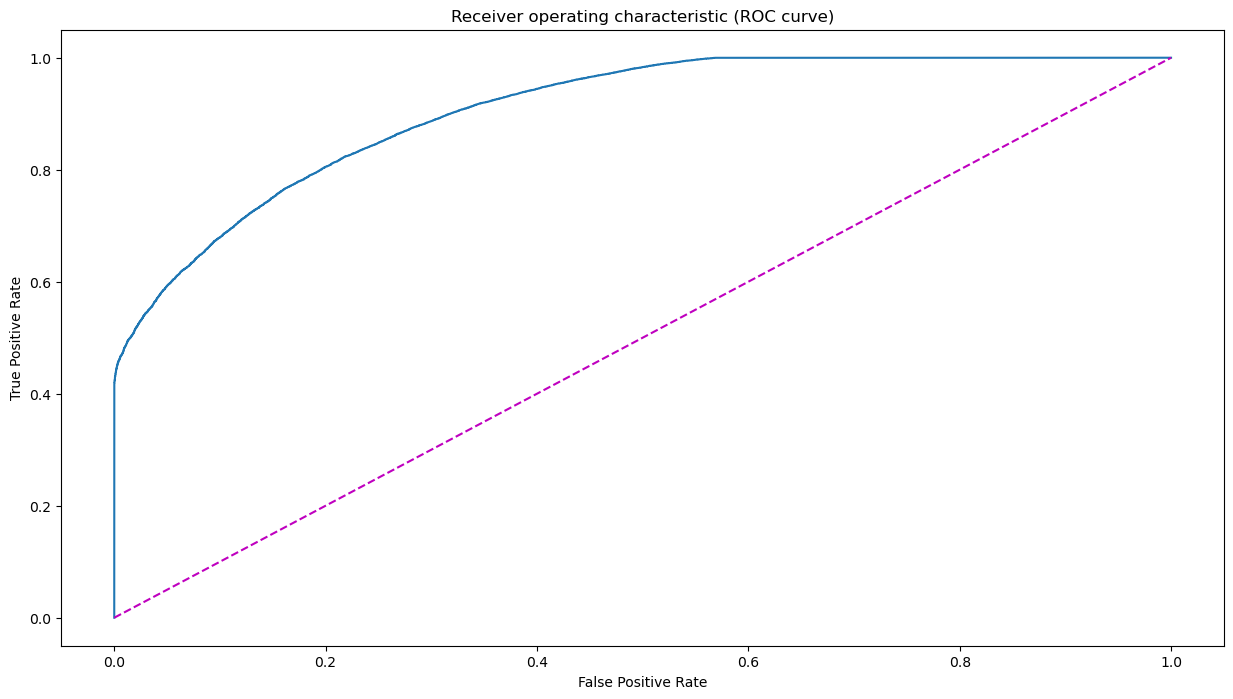

In [274]:
# area under ROC curve
logit_roc_auc = roc_auc_score(y_test,y_pred)

# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize=(15,8))
plt.plot(fpr,tpr,label="Logistic Regression Roc curve (area = %0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"m--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC curve)")
plt.show()

In [288]:
roc_auc = auc(fpr, tpr)
roc_auc


0.9054398758324379

In [287]:
logit_roc_auc

0.8024073303954886

### Tradeoff

- The ROC curve area, representing model performance, is 80%. This indicates that the model effectively distinguishes between classes 80% of the time.

- Ideally, we aim for a higher True Positive Rate (TPR) and a lower False Positive Rate (FPR) to ensure accurate predictions.

- The ROC curve illustrates that as True Positives increase, there's a simultaneous increase in False Positives,which implies that while identifying more Fully Paid customers, there's a greater risk of misclassifying Charged Off customers as Fully Paid, potentially leading to Non-Performing Assets (NPAs).

- So to reduce the above mentioned risk ,Reducing FPR while maintaining TPR is crucial .By shifting False Positives towards the left on the ROC curve, the model's overall performance, as measured by AUC, can improve.

  
- This improvement in AUC relies on maintaining a high True Positive Rate while reducing False Positives.


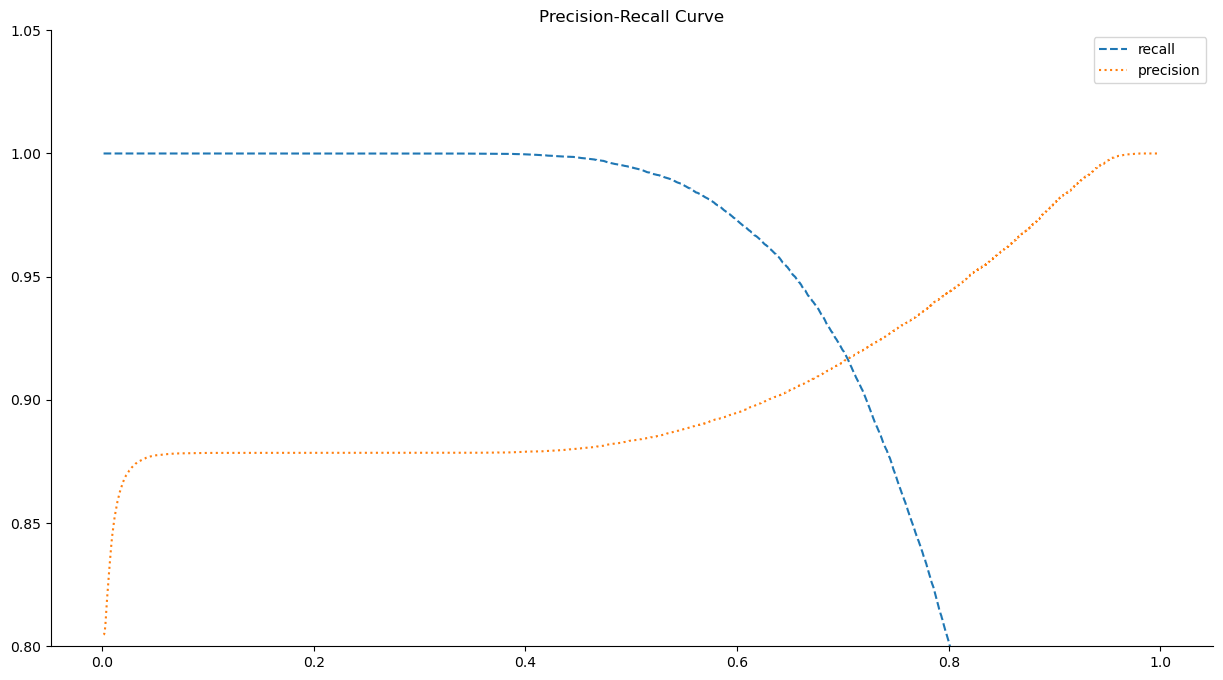

In [283]:
precision, recall, thresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])

plt.figure(figsize=(15,8))
plt.plot(thresholds, recall[0:thresholds.shape[0]], label="recall",linestyle="--")
plt.plot(thresholds, precision[0:thresholds.shape[0]], label="precision",linestyle="dotted")
plt.ylim([0.8, 1.05])
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
sns.despine()
plt.show()

In [284]:
auc(recall, precision).round(3)

0.974

**The Area Under the Curve (AUC) for the precision-recall curve is 0.974. This high AUC value suggests that the model achieves excellent performance in distinguishing between positive and negative classes, showcasing strong precision-recall characteristics.**


**Questionnaire :**

- What percentage of customers have fully paid their Loan Amount?
- Comment about the correlation between Loan Amount and Installment features.
- The majority of people have home ownership as _______.
- People with grades ‘A’ are more likely to fully pay their loan. (T/F)
- Name the top 2 afforded job titles.
- Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC,
Precision,
Recall,
F1 Score
- How does the gap in precision and recall affect the bank?
- Which were the features that heavily affected the outcome?
- Will the results be affected by geographical location? (Yes/No)

**What percentage of customers have fully paid their Loan Amount?**

In [304]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

Around 80% of customers have fully paid their Loan Amount.

**Comment about the correlation between Loan Amount and Installment features.**

In [305]:
df[["loan_amnt", "installment"]].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.953929
installment,0.953929,1.000000


From above data we can see that correlation between Loan Amount and Installment features is around 0.95, which means they are highly correlated features.

**The majority of people have home ownership as _______.**

In [293]:
(df["home_ownership"].value_counts(normalize=True)*100).to_frame()

,proportion
home_ownership,
MORTGAGE,50.084085
RENT,40.347953
OWN,9.531096
OTHER,0.028281
NONE,0.007828
ANY,0.000758


The majority of people have home ownership as mortgage followed by rent.

**People with grades ‘A’ are more likely to fully pay their loan.**

In [294]:
pd.crosstab(df["grade"],df["loan_status"], normalize = "index")

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


Yes,93% of people with grade 'A' have fully paid the loan

**Name the top 2 afforded job titles.**

In [303]:
df.groupby("emp_title")["loan_status"].count().sort_values(ascending=False).to_frame()[1:3]

,loan_status
emp_title,
Teacher,4389
Manager,4250


The top 2 afforded job titles are Teacher and Manager

**Thinking from a bank's perspective, which metric should our primary focus be on.. ROC AUC, Precision, Recall, F1 Score.**

- From a bank's perspective, the primary focus should be on minimizing risks while maximizing profitability. Therefore, the most relevant metric would be Precision.

- Precision represents the proportion of correctly predicted positive instances (e.g., customers who fully pay their loans) out of all instances predicted as positive. In the context of a bank, precision reflects the accuracy of identifying creditworthy customers who are likely to repay their loans. Maximizing precision ensures that the bank minimizes the number of false positives, which are instances where the bank incorrectly identifies customers as creditworthy when they are not. By prioritizing precision, the bank can reduce the risk of loan defaults which can help them in maximizing profit.

- While ROC AUC, Recall, and F1 Score are also important metrics, precision aligns most with the bank's objective of minimizing risks and ensuring the quality of its loan disburbal.

**How does the gap in precision and recall affect the bank?**

- For efficient working of model, it's crucial to evaluate both false positives and false negatives, which are gauged through metrics like precision and recall. When precision and recall is low, it poses a significant risk for the bank.So, as the gap between precision and recall widens, there will be increase in incorrect predictions.
- Good precision means less False Positives i.e. less loan defaults(less NPA).
- Good recall means less False Negatives i.e. not loosing on eligible customers.

**Which were the features that heavily affected the outcome?**

Address(Zipcode), Annual_Income, Grade seems to be most important features affecting the outcome.


**Will the results be affected by geographical location? (Yes/No)**

Yes, from df_ above we can see that all the zip_codes are having good coefficients, so geographical location has impact on our result.

### Actionable Insights

- For optimum result we should work on reducing FPR while maintaining/improving TPR.
- For good results False Negatives should also be taken care of efficiently.
- Adress is having a significant role in positive as well as negative loan status so, more offers and good intrest rates should be provided to customers belonging to areas having high positive loan paid status and measures should be taken against customers from area having high loan default history(Negative Coefficient).
- Customers in grade A,B,C have high chances of loan repayment.so, they should be focused on more for maximizing bank revenue.
- Also there is high chance of loan repayment if loan term is 36 months and employment length is 10 or more years so customers belonging to these segments should be given priority and some extra added advantages.

### Recommendations

- More emphasis should be put on  precision to minimize loan default risks.
- Focus on maximizing the F1 score and area under the Precision-Recall Curve to effectively manage the precision-recall trade-off. This ensures identifying most defaulters while reducing false positives and false negatives, enhancing risk management and correct customer identification.
- Consider using more complex classifiers like Random Forests or XGBoost and perform hyperparameter tuning to enhance model performance and capture intricate relationships in the data.
- Scrutinize loans with lower grades more rigorously and consider adjusting interest rates to compensate for higher risk.
- Implement targeted strategies for high-risk zip codes, such as additional verification steps or higher interest rates.
- Evaluate small business loans with additional checks and collateral requirements to mitigate default risk.
  